<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/AnalisedosDadosPH/blob/main/analiseexplorat%C3%B3riadadospH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise Exploratória dos Dados 

**medição Sensor desenvolvido x meio aquoso**

In [16]:
import pandas as pd 
read_file = pd.read_excel ("/content/dados calibração esp32 PH solo.xlsx")

In [17]:
read_file.to_csv ("/content/dados calibração esp32 PH solo.csv",  
                  index = None, 
                  header=True)

In [18]:
df = pd.DataFrame(pd.read_csv("/content/dados calibração esp32 PH solo.csv"))


In [19]:
df

,nº,pH(M.Tradicional-Aquoso),pH(M.Direta-Akso),Valores Analog ESP32(media 5 valores)
0,1,5.1,6.43,711.00
1,2,4.5,5.84,724.00
2,3,7.0,7.80,601.00
3,4,4.2,4.41,763.50
4,5,6.1,6.43,645.25
...,...,...,...,...
73,74,7.5,6.73,644.10
74,75,7.0,6.97,609.40
75,76,7.3,7.51,578.80
76,77,6.1,6.71,650.50


In [20]:
#excuindo coluna de indice
del df['nº']

In [41]:
df

,pH(M.Tradicional-Aquoso),pH(M.Direta-Akso),Valores Analog ESP32(media 5 valores)
0,5.1,6.43,711.00
1,4.5,5.84,724.00
2,7.0,7.80,601.00
3,4.2,4.41,763.50
4,6.1,6.43,645.25
...,...,...,...
73,7.5,6.73,644.10
74,7.0,6.97,609.40
75,7.3,7.51,578.80
76,6.1,6.71,650.50


#Correlação de Pearson
coeficiente de Pearson é a medida estatística mais usada para obter a associação entre duas variáveis linearmente relacionadas

In [42]:
correlation = df.corr()


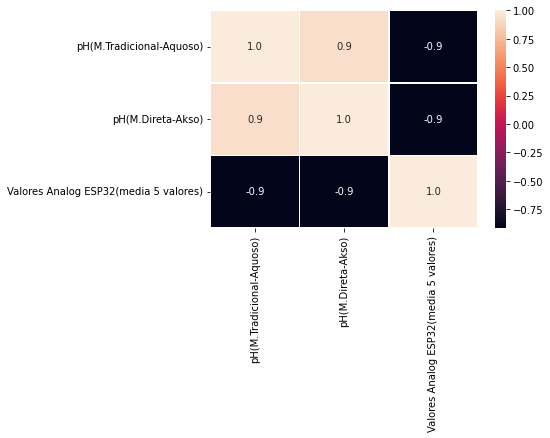

In [43]:
# plot da matriz de correlação
import seaborn as sn
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

**Correlação entre pH(medição meio aquoso) x Valores analogicos do sensor**

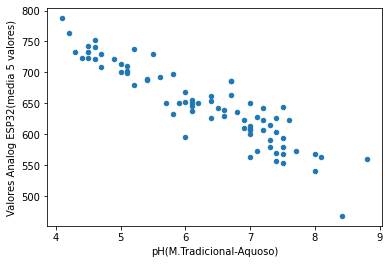

In [49]:
df.plot.scatter(x='pH(M.Tradicional-Aquoso)',y='Valores Analog ESP32(media 5 valores)');

In [47]:
import pandas as pd
from scipy.stats import pearsonr
import numpy as np


In [48]:
#Calculando o teste de correlação de Pearson entre pH meio aquoso x Valores analogicos do sensor 
corr = np.corrcoef(df['pH(M.Tradicional-Aquoso)'], df['Valores Analog ESP32(media 5 valores)'])
print(corr)

[[ 1.         -0.91352823]
 [-0.91352823  1.        ]]


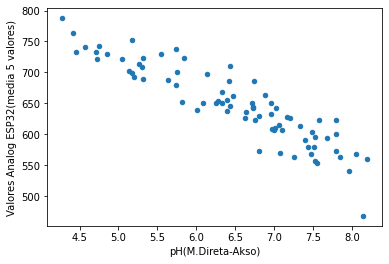

In [51]:
df.plot.scatter(x='pH(M.Direta-Akso)',y='Valores Analog ESP32(media 5 valores)');

In [52]:
#Calculando o teste de correlação de Pearson entre pH medição direta x Valores analogicos do sensor 
corr = np.corrcoef(df['pH(M.Direta-Akso)'], df['Valores Analog ESP32(media 5 valores)'])
print(corr)

[[ 1.         -0.91148251]
 [-0.91148251  1.        ]]


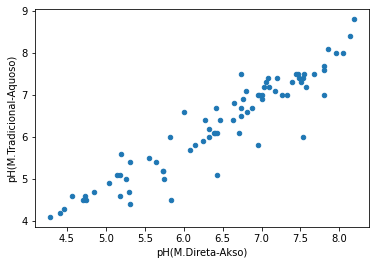

In [53]:
df.plot.scatter(x='pH(M.Direta-Akso)',y='pH(M.Tradicional-Aquoso)');

In [54]:
#Calculando o teste de correlação de Pearson entre pH medição direta x pH medição em meio aquoso 
corr = np.corrcoef(df['pH(M.Direta-Akso)'], df['pH(M.Tradicional-Aquoso)'])
print(corr)

[[1.         0.93749018]
 [0.93749018 1.        ]]


#Correlação Spearman 
correlação de Spearman avalia a relação monótona (linear e não linear) entre duas variáveis

In [55]:
my_r = df.corr(method="spearman")
print(my_r)

                                       pH(M.Tradicional-Aquoso)  \
pH(M.Tradicional-Aquoso)                               1.000000   
pH(M.Direta-Akso)                                      0.929007   
Valores Analog ESP32(media 5 valores)                 -0.910509   

                                       pH(M.Direta-Akso)  \
pH(M.Tradicional-Aquoso)                        0.929007   
pH(M.Direta-Akso)                               1.000000   
Valores Analog ESP32(media 5 valores)          -0.925010   

                                       Valores Analog ESP32(media 5 valores)  
pH(M.Tradicional-Aquoso)                                           -0.910509  
pH(M.Direta-Akso)                                                  -0.925010  
Valores Analog ESP32(media 5 valores)                               1.000000  


In [56]:
def display_correlation(discorr):
    r = discorr.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(discorr.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as pl

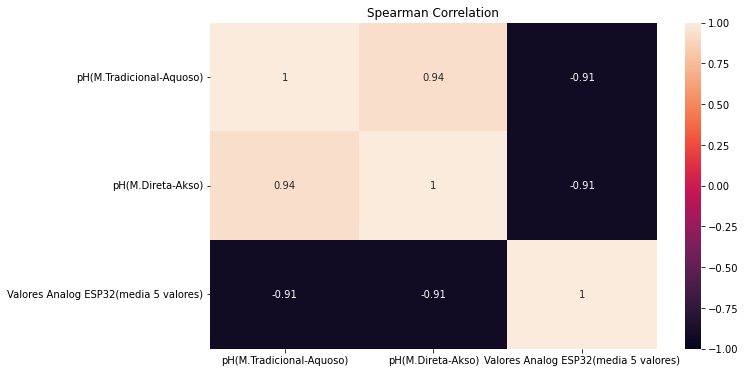

In [60]:

r_simple=display_correlation(df)

#Correlação de Kendall
mede a associação ordinal entre duas variáveis

In [64]:
import pandas as pd
from pylab import rcParams
import seaborn as sb
from scipy.stats.stats import kendalltau


In [65]:
corr = df.corr(method='kendall')

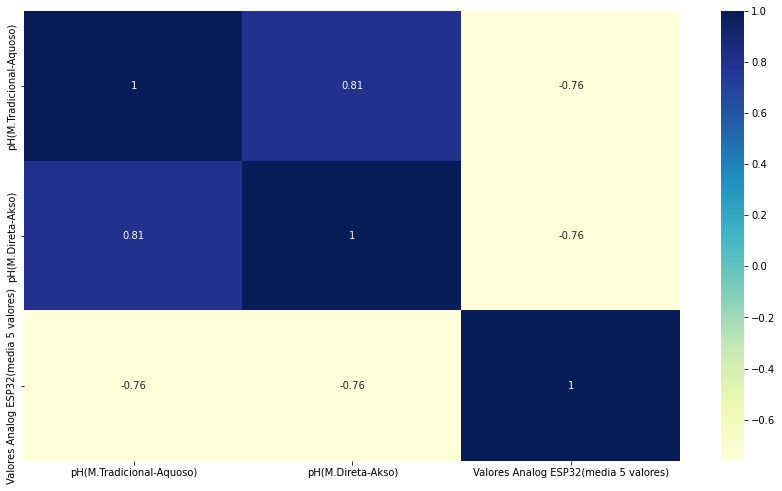

In [66]:
rcParams['figure.figsize'] = 14.7,8.27
sb.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

#Outleires 

In [67]:
# Configurações dos gráficos
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20

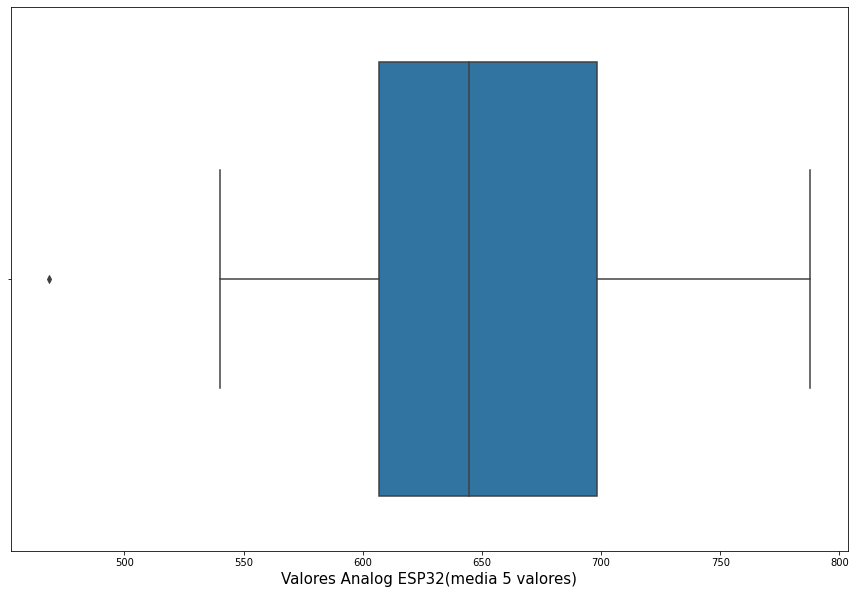

In [68]:
# Identificando outliers 
sns.boxplot(x = df['Valores Analog ESP32(media 5 valores)'])
plt.show()

In [69]:
numeric_col = ['Valores Analog ESP32(media 5 valores)']

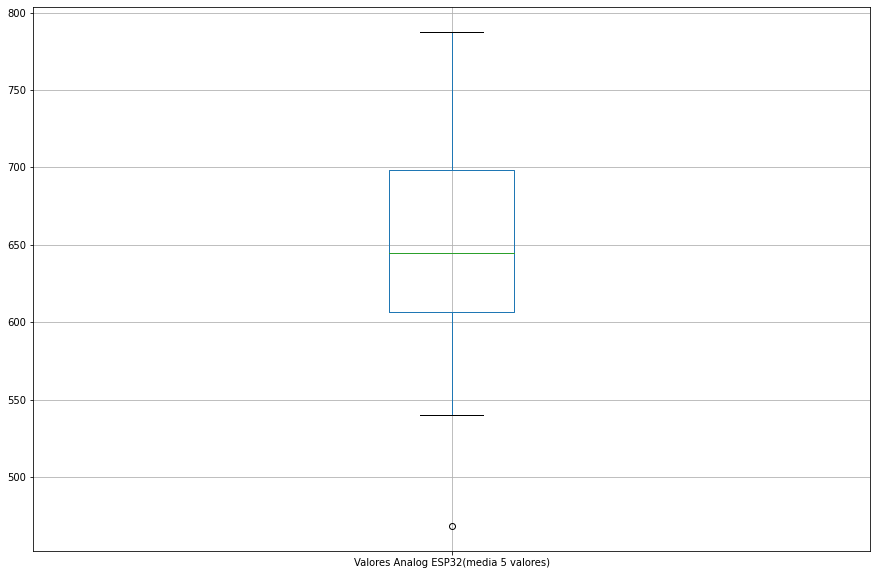

In [70]:
df.boxplot(numeric_col)

#Remoção de valores atípicos
trata os outliers que detectamos usando o Boxplot
Usando IQR, podemos seguir a abordagem abaixo para substituir os valores discrepantes por um valor NULL:

Calcule o primeiro e o terceiro quartil (Q1 e Q3).

Além disso, avalie o intervalo interquartil, IQR = Q3-Q1.

Estime o limite inferior, o limite inferior = Q1*1,5.
Estime o limite superior, limite superior = Q3*1,5.

Substitua os pontos de dados que estão fora do limite inferior e superior por um valor NULL.

In [71]:
for x in ['Valores Analog ESP32(media 5 valores)']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

Assim, usamos numpy.percentile() methodpara calcular os valores de Q1 e Q3. Além disso, substituímos os valores discrepantes por numpy.nanvalores NULL.

Tendo substituído os outliers por nan, vamos agora verificar a soma dos valores nulos ou valores ausentes usando o código abaixo:

In [72]:
df.isnull().sum()

pH(M.Tradicional-Aquoso)                 0
pH(M.Direta-Akso)                        0
Valores Analog ESP32(media 5 valores)    1
dtype: int64

descartaríamos os valores nulos usando a pandas.dataframe.dropna()

In [73]:
df = df.dropna(axis = 0)


In [74]:
df.isnull().sum()

pH(M.Tradicional-Aquoso)                 0
pH(M.Direta-Akso)                        0
Valores Analog ESP32(media 5 valores)    0
dtype: int64

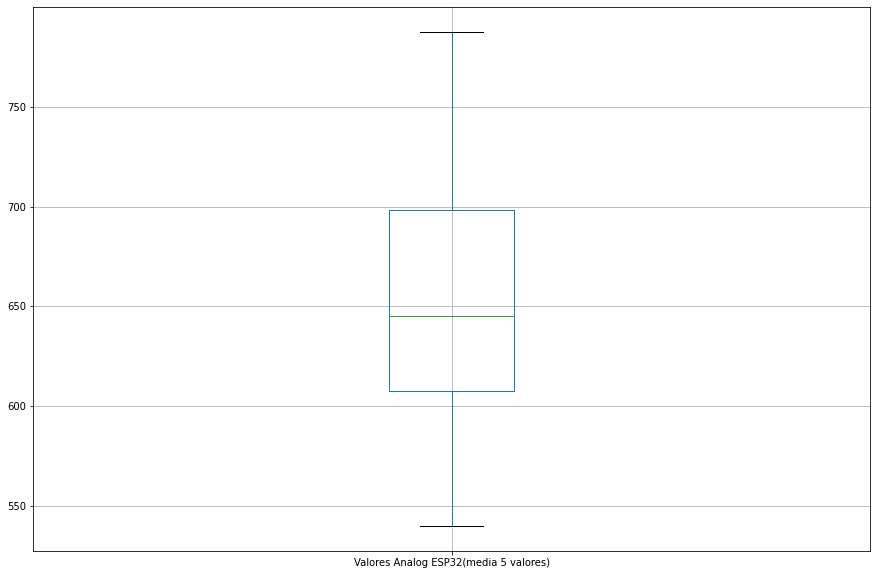

In [77]:
df.boxplot(numeric_col)

In [78]:
#desvio padrão
df.std()

pH(M.Tradicional-Aquoso)                  1.140688
pH(M.Direta-Akso)                         1.019155
Valores Analog ESP32(media 5 valores)    59.258084
dtype: float64

In [79]:
#Variancia
df.var()

pH(M.Tradicional-Aquoso)                    1.301169
pH(M.Direta-Akso)                           1.038676
Valores Analog ESP32(media 5 valores)    3511.520556
dtype: float64

In [80]:
#distorção
print(df.skew())

pH(M.Tradicional-Aquoso)                -0.220534
pH(M.Direta-Akso)                       -0.399240
Valores Analog ESP32(media 5 valores)    0.164504
dtype: float64


In [82]:
#descrição estatistica
df.describe(include='all')

,pH(M.Tradicional-Aquoso),pH(M.Direta-Akso),Valores Analog ESP32(media 5 valores)
count,77.000000,77.000000,77.000000
mean,6.267532,6.440000,650.582078
std,1.140688,1.019155,59.258084
min,4.100000,4.280000,540.000000
25%,5.200000,5.740000,607.500000
50%,6.400000,6.640000,645.250000
75%,7.200000,7.200000,698.500000
max,8.800000,8.190000,787.500000


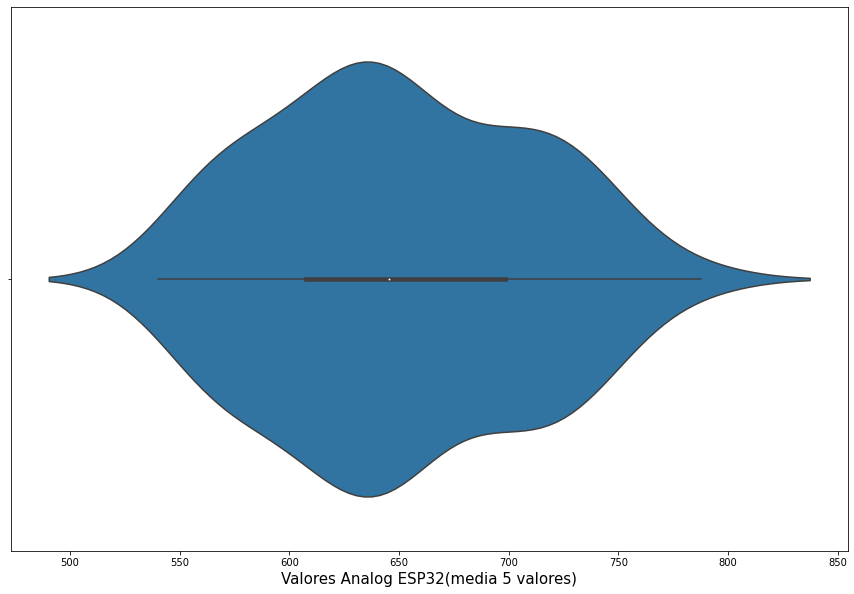

In [97]:
sns.violinplot(x="Valores Analog ESP32(media 5 valores)", data = df)

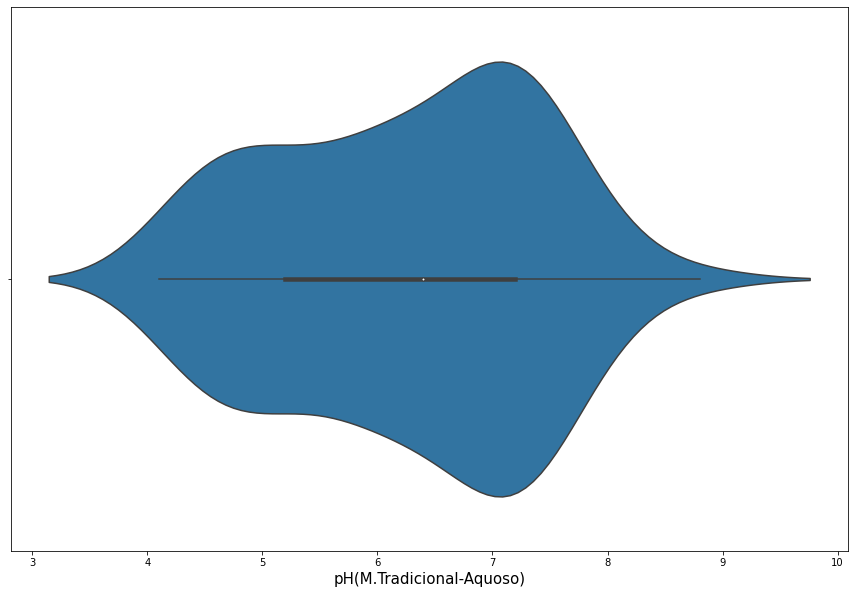

In [98]:
sns.violinplot(x="pH(M.Tradicional-Aquoso)", data = df)

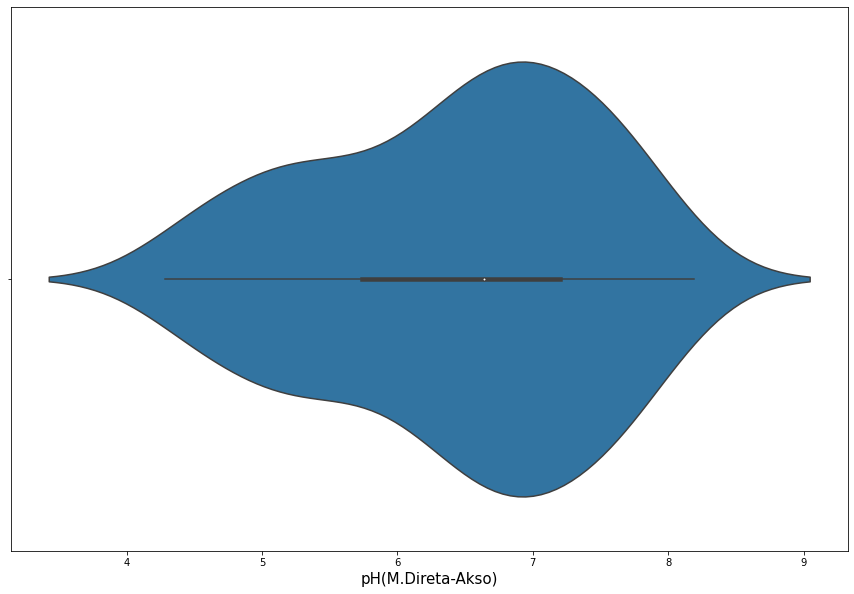

In [99]:
sns.violinplot(x="pH(M.Direta-Akso)", data = df)

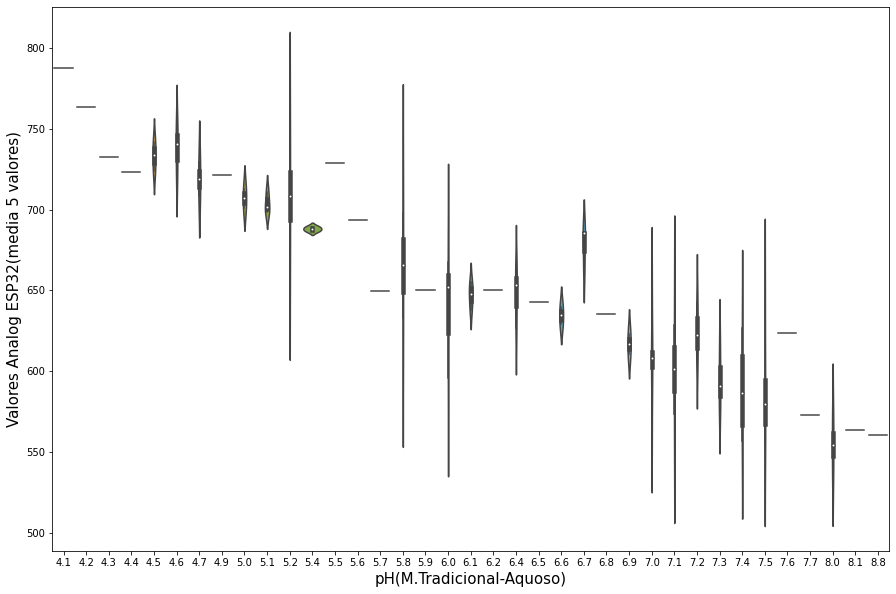

In [101]:
sns.violinplot(x="pH(M.Tradicional-Aquoso)", y="Valores Analog ESP32(media 5 valores)", data=df)


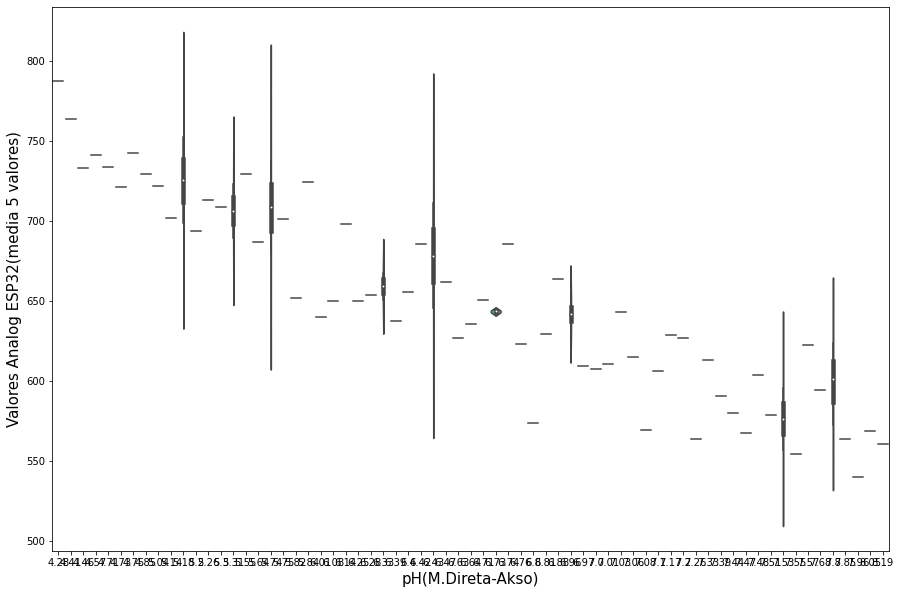

In [105]:
sns.violinplot(x="pH(M.Direta-Akso)", y="Valores Analog ESP32(media 5 valores)", data=df)


#Regressão Linear